In [2]:
import pandas as pd

# Cargar los datos
data = pd.read_csv("Wellbeing_and_lifestyle_data_Kaggle.csv")

# 1. Eliminar filas con valores nulos
data_cleaned = data.dropna()  # Elimina todas las filas con valores nulos

# 2. Llenar los valores nulos con un valor específico (si lo prefieres)
# data_cleaned = data.fillna(0)  # O con un valor como 0, dependiendo de lo que prefieras

# 3. Eliminar duplicados
data_cleaned = data_cleaned.drop_duplicates()

# 4. Convertir las columnas de fechas a tipo datetime (si hay alguna columna de fecha)
# Si no hay columnas de fecha, omite este paso
# data_cleaned['Timestamp'] = pd.to_datetime(data_cleaned['Timestamp'], format='%d/%m/%y')

# 5. Asegurarse de que las columnas categóricas sean del tipo adecuado (por ejemplo, "GENDER", "AGE")
data_cleaned['GENDER'] = data_cleaned['GENDER'].astype('category')
data_cleaned['AGE'] = data_cleaned['AGE'].astype('category')

# 6. Revisar valores atípicos para las columnas numéricas (por ejemplo, BMI_RANGE, WORK_LIFE_BALANCE_SCORE)
# Se puede hacer un análisis rápido de los valores estadísticos
print(data_cleaned.describe())

# 7. Convertir columnas numéricas que puedan estar como objetos (por ejemplo, 'DAILY_STRESS', 'FRUITS_VEGGIES', etc.)
data_cleaned['DAILY_STRESS'] = pd.to_numeric(data_cleaned['DAILY_STRESS'], errors='coerce')
data_cleaned['FRUITS_VEGGIES'] = pd.to_numeric(data_cleaned['FRUITS_VEGGIES'], errors='coerce')

# 8. Verificar y limpiar columnas con espacios en blanco en los nombres (si existen)
data_cleaned.columns = data_cleaned.columns.str.strip()

# 9. Verificar valores faltantes después de la limpieza
print(data_cleaned.isnull().sum())  # Muestra cuántos valores nulos hay en cada columna

# 10. Mostrar el dataframe limpio
data_cleaned.head()



       FRUITS_VEGGIES  PLACES_VISITED   CORE_CIRCLE  SUPPORTING_OTHERS  \
count    15490.000000    15490.000000  15490.000000       15490.000000   
mean         2.922466        5.225823      5.513170           5.619496   
std          1.443356        3.315740      2.839156           3.244341   
min          0.000000        0.000000      0.000000           0.000000   
25%          2.000000        2.000000      3.000000           3.000000   
50%          3.000000        5.000000      5.000000           5.000000   
75%          4.000000        8.000000      8.000000          10.000000   
max          5.000000       10.000000     10.000000          10.000000   

       SOCIAL_NETWORK   ACHIEVEMENT      DONATION     BMI_RANGE  \
count    15490.000000  15490.000000  15490.000000  15490.000000   
mean         6.489606      4.000194      2.716333      1.409038   
std          3.084922      2.760281      1.851438      0.491672   
min          0.000000      0.000000      0.000000      1.000000  

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,7/7/15,3,2.0,2,5,0,5,2,0,1,...,7,5,5,1,4,0,5,36 to 50,Female,609.5
1,7/7/15,2,3.0,4,3,8,10,5,2,2,...,8,2,2,2,3,2,6,36 to 50,Female,655.6
2,7/7/15,2,3.0,3,4,4,10,3,2,2,...,8,10,2,2,4,8,3,36 to 50,Female,631.6
3,7/7/15,3,3.0,10,3,10,7,2,5,2,...,5,7,5,1,5,2,0,51 or more,Female,622.7
4,7/7/15,5,1.0,3,3,10,4,2,4,2,...,7,0,0,2,8,1,5,51 or more,Female,663.9


In [8]:
import os
import warnings
import numpy as np
import pandas as pd
import joblib

# Ignorar advertencias
warnings.filterwarnings("ignore")

# Fijar estado aleatorio
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

# Ruta a tu archivo CSV
DATA_FILE = "Wellbeing_and_lifestyle_data_Kaggle.csv"  # Cambia esta ruta a la de tu archivo limpio
TARGET = "ABANDONO_HABITOS_SALUDABLES"  # Definimos nuestra nueva variable objetivo

# Asegurarse de que el archivo exista
assert os.path.exists(DATA_FILE), f"No se encuentra {DATA_FILE}"

# Cargar el dataset
df = pd.read_csv(DATA_FILE)

# =========================================
# 1) Limpiar y crear la variable objetivo
# =========================================

# Convertir las columnas relevantes a tipo numérico (si no lo son)
df['DAILY_STRESS'] = pd.to_numeric(df['DAILY_STRESS'], errors='coerce')
df['SLEEP_HOURS'] = pd.to_numeric(df['SLEEP_HOURS'], errors='coerce')
df['PLACES_VISITED'] = pd.to_numeric(df['PLACES_VISITED'], errors='coerce')
df['FRUITS_VEGGIES'] = pd.to_numeric(df['FRUITS_VEGGIES'], errors='coerce')

# Crear una columna 'ABANDONO_HABITOS_SALUDABLES' según las condiciones
df['ABANDONO_HABITOS_SALUDABLES'] = np.where(
    (df['PLACES_VISITED'] <= 3) |  # Poca actividad física (número de lugares visitados bajos)
    (df['SLEEP_HOURS'] < 6) |  # Mal sueño (menos de 6 horas de sueño)
    (df['DAILY_STRESS'] >= 7),  # Alto nivel de estrés (estrés alto es un mal indicador de bienestar)
    1, 0  # 1 para abandono de hábitos saludables, 0 para mantener hábitos saludables
)

# Selección de las 10 variables más relevantes para el análisis de abandono de hábitos saludables
features = [
    'DAILY_STRESS', 'SLEEP_HOURS', 'FRUITS_VEGGIES', 'SOCIAL_NETWORK', 'ACHIEVEMENT', 
    'SUPPORTING_OTHERS', 'PLACES_VISITED', 'BMI_RANGE', 'WORK_LIFE_BALANCE_SCORE', 'TIME_FOR_PASSION'
]

# Definir el conjunto de características (X) y la etiqueta (y)
X = df[features]
y = df[TARGET]  # La columna objetivo es 'ABANDONO_HABITOS_SALUDABLES'

# Convertir variables categóricas a variables dummy si es necesario
X = pd.get_dummies(X, drop_first=True)

# =========================================
# 2) Mostrar información básica
# =========================================

# Muestra el tamaño de las características (X) y la prevalencia de la clase positiva (abandono de hábitos saludables)
print("Shape:", X.shape, "| Prevalencia(ABANDONO_HABITOS_SALUDABLES=1):", (y == 1).mean())


Shape: (15972, 10) | Prevalencia(ABANDONO_HABITOS_SALUDABLES=1): 0.40777610818933135


In [9]:
# =========================================
# 2) Split temprano (80/20)
# =========================================
from sklearn.model_selection import train_test_split

# Dividir los datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=RANDOM_STATE
)

# Imprimir el tamaño de los conjuntos de entrenamiento y prueba
print(f"Train: {X_train.shape} | Test: {X_test.shape}")

Train: (12777, 10) | Test: (3195, 10)


In [23]:
# =========================================
# 3) Preprocesamiento (en pipeline)
# =========================================
# 3) Preprocesamiento (en pipeline)
# =========================================
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

cat_features = X_train.select_dtypes(include=["object","category"]).columns.tolist()
num_features = X_train.select_dtypes(include=["number","bool"]).columns.tolist()

# OHE compatible (si tu sklearn no soporta sparse_output, cambia a sparse=False)
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_features),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_features),
    ]
)

smote = SMOTE(random_state=RANDOM_STATE, k_neighbors=3)

def build_pipe(model):
    return ImbPipeline([("prep", preprocessor), ("smote", smote), ("model", model)])



In [13]:
!pip install xgboost lightgbm catboost



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 MB 2.0 MB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 2.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 2.1 MB/s eta 0:00:0000:0100:02m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.9/295.9 MB 2.0 MB/s eta 0:00:0000:0100:04


In [24]:
# =========================================
# 4) Modelos candidatos
# =========================================
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

candidates = [
    ("LRN", LogisticRegression(max_iter=2000, random_state=RANDOM_STATE)),
    ("LDA", LinearDiscriminantAnalysis()),
    ("KNN", KNeighborsClassifier()),
    ("GNB", GaussianNB()),
    ("DTS", DecisionTreeClassifier(random_state=RANDOM_STATE)),
    ("RFS", RandomForestClassifier(n_estimators=300, random_state=RANDOM_STATE, n_jobs=-1)),
    ("NNM", MLPClassifier(hidden_layer_sizes=(64,), max_iter=600, random_state=RANDOM_STATE)),
    ("XGB", XGBClassifier(tree_method="hist", eval_metric="logloss", random_state=RANDOM_STATE,
                          n_estimators=400, learning_rate=0.05, max_depth=6,
                          subsample=0.9, colsample_bytree=0.9, n_jobs=-1)),
    ("LGB", LGBMClassifier(n_estimators=500, learning_rate=0.05, max_depth=-1,
                           subsample=0.9, colsample_bytree=0.9,
                           random_state=RANDOM_STATE, n_jobs=-1, verbosity=-1)),
    ("CAT", CatBoostClassifier(iterations=600, learning_rate=0.05, depth=6,
                               random_state=RANDOM_STATE, l2_leaf_reg=3.0,
                               verbose=False, allow_writing_files=False, thread_count=-1)),
]

In [25]:
# =========================================
# 5) Entrenar Baseline con CV (sin tuning)
# =========================================
from sklearn.model_selection import StratifiedKFold, cross_validate
import pandas as pd

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
scoring = {"accuracy":"accuracy", "f1_macro":"f1_macro", "roc_auc":"roc_auc"}

baseline_rows = []
for name, model in candidates:
    pipe = build_pipe(model)
    scores = cross_validate(pipe, X_train, y_train, cv=cv, scoring=scoring, n_jobs=-1)
    baseline_rows.append({
        "model":name,
        "acc_mean":scores["test_accuracy"].mean(),
        "acc_std" :scores["test_accuracy"].std(),
        "f1_mean" :scores["test_f1_macro"].mean(),
        "f1_std"  :scores["test_f1_macro"].std(),
        "auc_mean":scores["test_roc_auc"].mean(),
    })
    print(f"{name:>4} | ACC {scores['test_accuracy'].mean():.3f} "
          f"| F1 {scores['test_f1_macro'].mean():.3f} | AUC {scores['test_roc_auc'].mean():.3f}")

baseline_df = pd.DataFrame(baseline_rows).sort_values("f1_mean", ascending=False)
display(baseline_df)

baseline_best_name  = baseline_df.iloc[0]["model"]
baseline_best_model = dict(candidates)[baseline_best_name]
print(f">>> Baseline ganador: {baseline_best_name}")


 LRN | ACC 0.900 | F1 0.897 | AUC 0.968
 LDA | ACC 0.874 | F1 0.873 | AUC 0.970
 KNN | ACC 0.906 | F1 0.904 | AUC 0.967
 GNB | ACC 0.853 | F1 0.850 | AUC 0.937
 DTS | ACC 1.000 | F1 1.000 | AUC 1.000
 RFS | ACC 1.000 | F1 1.000 | AUC 1.000
 NNM | ACC 1.000 | F1 1.000 | AUC 1.000
 XGB | ACC 1.000 | F1 1.000 | AUC 1.000
 LGB | ACC 1.000 | F1 1.000 | AUC 1.000
 CAT | ACC 1.000 | F1 1.000 | AUC 1.000


,model,acc_mean,acc_std,f1_mean,f1_std,auc_mean
4,DTS,1.000000,0.000000,1.000000,0.000000,1.000000
5,RFS,1.000000,0.000000,1.000000,0.000000,1.000000
6,NNM,1.000000,0.000000,1.000000,0.000000,1.000000
7,XGB,1.000000,0.000000,1.000000,0.000000,1.000000
8,LGB,1.000000,0.000000,1.000000,0.000000,1.000000
9,CAT,1.000000,0.000000,1.000000,0.000000,1.000000
2,KNN,0.906394,0.004204,0.903803,0.004234,0.966875
0,LRN,0.899663,0.005615,0.897455,0.005695,0.968263
1,LDA,0.874305,0.004540,0.872998,0.004554,0.969593
3,GNB,0.852627,0.009257,0.849945,0.009364,0.936757


>>> Baseline ganador: DTS


In [26]:
# =========================================
# 6) Tuning con CV y elección del ganador (rápido)
# =========================================
import tempfile, shutil
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from scipy.stats import randint, uniform
try:
    from scipy.stats import loguniform
except Exception:
    from sklearn.utils.fixes import loguniform  # fallback

cv_light = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
cv_heavy = StratifiedKFold(n_splits=3, shuffle=True, random_state=RANDOM_STATE)

param_spaces = {
    "LRN":{"model__C":loguniform(1e-2,1e1),"model__penalty":["l2"],
           "model__solver":["lbfgs","liblinear"],"model__class_weight":[None,"balanced"]},
    "RFS":{"model__n_estimators":randint(200,500),"model__max_depth":randint(4,14),
           "model__min_samples_split":randint(2,16),"model__min_samples_leaf":randint(1,8),
           "model__max_features":["sqrt","log2",None],"model__bootstrap":[True,False]},
    "XGB":{"model__n_estimators":randint(250,600),"model__learning_rate":loguniform(5e-3,2e-1),
           "model__max_depth":randint(3,9),"model__subsample":uniform(0.7,0.3),
           "model__colsample_bytree":uniform(0.7,0.3),"model__min_child_weight":randint(1,6)},
    "LGB":{"model__n_estimators":randint(300,800),"model__learning_rate":loguniform(5e-3,2e-1),
           "model__num_leaves":randint(16,128),"model__max_depth":randint(-1,12),
           "model__min_child_samples":randint(10,50),"model__subsample":uniform(0.7,0.3),
           "model__colsample_bytree":uniform(0.7,0.3),"model__reg_lambda":loguniform(1e-3,10)},
    "CAT":{"model__iterations":randint(300,700),"model__learning_rate":loguniform(5e-3,2e-1),
           "model__depth":randint(4,10),"model__l2_leaf_reg":loguniform(1e-2,30),
           "model__border_count":randint(32,255)},
}

to_tune = [
    ("LRN", LogisticRegression(max_iter=2000, random_state=RANDOM_STATE)),
    ("RFS", RandomForestClassifier(random_state=RANDOM_STATE, n_jobs=1)),
    ("XGB", XGBClassifier(tree_method="hist", eval_metric="logloss", random_state=RANDOM_STATE, n_jobs=1)),
    ("LGB", LGBMClassifier(random_state=RANDOM_STATE, n_jobs=1, verbosity=-1)),
    ("CAT", CatBoostClassifier(random_state=RANDOM_STATE, verbose=False, allow_writing_files=False, thread_count=1)),
]

refit_metric = "f1_macro"
scoring_opt = {"f1_macro":"f1_macro", "roc_auc":"roc_auc", "accuracy":"accuracy"}

best_models, opt_rows = [], []
cache_dir = tempfile.mkdtemp(prefix="skcache_")

try:
    for name, base_model in to_tune:
        pipe = build_pipe(base_model)
        try: pipe.set_params(memory=cache_dir)
        except: pass
        heavy = name in ["XGB","LGB","CAT"]
        search = RandomizedSearchCV(
            pipe, param_spaces[name],
            n_iter=(15 if heavy else 12), cv=(cv_heavy if heavy else cv_light),
            scoring=scoring_opt, refit=refit_metric, n_jobs=-1,
            random_state=RANDOM_STATE, verbose=1, return_train_score=False,
            error_score=np.nan
        )
        search.fit(X_train, y_train)
        best_models.append((name, search.best_estimator_, search.best_score_, search.best_params_))
    best_models.sort(key=lambda x: (x[2] if pd.notna(x[2]) else -1), reverse=True)
    best_name, final_pipe_opt, best_cv_f1, best_params = best_models[0]
    print(f">>> GANADOR OPTIMIZADO: {best_name} (F1 CV={best_cv_f1:.4f})")
finally:
    shutil.rmtree(cache_dir, ignore_errors=True)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 3 folds for each of 15 candidates, totalling 45 fits
Fitting 3 folds for each of 15 candidates, totalling 45 fits
Fitting 3 folds for each of 15 candidates, totalling 45 fits
>>> GANADOR OPTIMIZADO: RFS (F1 CV=1.0000)


In [28]:
# =========================================
# 7) Comparación justa (solo CV) - baseline vs ganador
# =========================================
from sklearn.model_selection import StratifiedKFold, cross_validate

same_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

pipe_baseline_best = build_pipe(baseline_best_model)
pipe_tuned_best    = final_pipe_opt

def cv_summary(pipe, name):
    scores = cross_validate(pipe, X_train, y_train, cv=same_cv,
                            scoring={"f1_macro":"f1_macro","roc_auc":"roc_auc","accuracy":"accuracy"},
                            n_jobs=-1)
    print(f"{name}: F1 {scores['test_f1_macro'].mean():.4f}±{scores['test_f1_macro'].std():.4f} | "
          f"AUC {scores['test_roc_auc'].mean():.4f} | ACC {scores['test_accuracy'].mean():.4f}")
    return scores["test_f1_macro"].mean()

f1_base = cv_summary(pipe_baseline_best, f"Baseline({baseline_best_name})")
f1_tune = cv_summary(pipe_tuned_best,   f"Tuned({best_name})")

# Regla: si la mejora < 0.005, elige el más simple (baseline); si no, el tuned.
if (f1_tune - f1_base) >= 0.005:
    winner_name, winner_pipe = best_name, pipe_tuned_best
else:
    winner_name, winner_pipe = baseline_best_name, pipe_baseline_best

print(f">>> Modelo seleccionado para TEST: {winner_name}")


Baseline(DTS): F1 1.0000±0.0000 | AUC 1.0000 | ACC 1.0000
Tuned(RFS): F1 1.0000±0.0000 | AUC 1.0000 | ACC 1.0000
>>> Modelo seleccionado para TEST: DTS


In [29]:
# =========================================
# 8) Política de decisión (mínima)
# =========================================
# TODO: más adelante optimizar el umbral con CV (máx F1 o meta Precision/Recall).
BEST_THR = 0.50
print(f"Umbral de decisión (provisorio): {BEST_THR}")


Umbral de decisión (provisorio): 0.5


In [30]:
# =========================================
# 9) Evaluación final en TEST
# =========================================
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, average_precision_score

winner_pipe.fit(X_train, y_train)
proba_test = winner_pipe.predict_proba(X_test)[:, 1]
y_pred     = (proba_test >= BEST_THR).astype(int)

print("\n== Reporte en TEST ==")
print(classification_report(y_test, y_pred, digits=4))
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, proba_test))
print("PR-AUC :", average_precision_score(y_test, proba_test))



== Reporte en TEST ==
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      1892
           1     1.0000    1.0000    1.0000      1303

    accuracy                         1.0000      3195
   macro avg     1.0000    1.0000    1.0000      3195
weighted avg     1.0000    1.0000    1.0000      3195

Matriz de confusión:
 [[1892    0]
 [   0 1303]]
ROC-AUC: 1.0
PR-AUC : 1.0


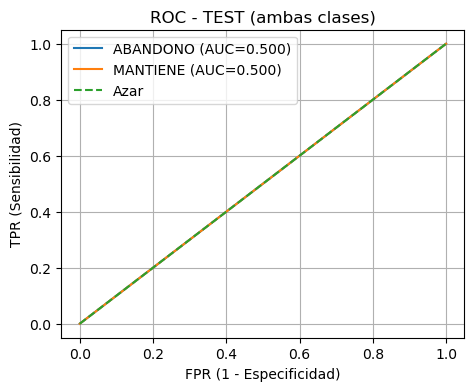

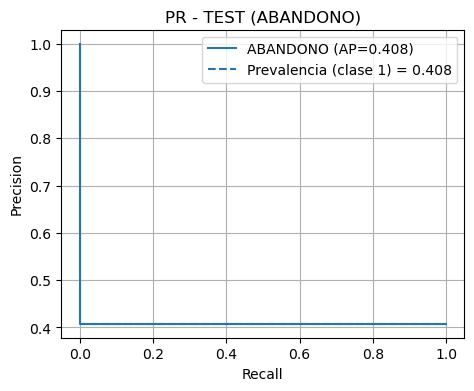

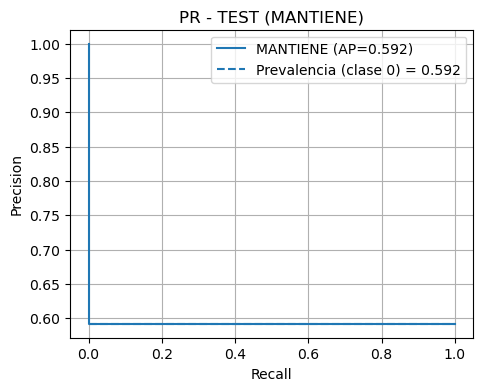

In [31]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Probabilidades por clase
proba = baseline_best_model.predict_proba(X_test)
proba1 = proba[:, 1]  # P(ABANDONO_HABITOS_SALUDABLES=1 | x)
proba0 = proba[:, 0]  # P(ABANDONO_HABITOS_SALUDABLES=0 | x)

y_true = np.asarray(y_test)

# -------- ROC --------
# Clase 1 (ABANDONO_HABITOS_SALUDABLES)
fpr1, tpr1, _ = roc_curve(y_true, proba1)
roc_auc1 = auc(fpr1, tpr1)

# Clase 0 (MANTIENE_HABITOS_SALUDABLES): hacemos positiva a la clase 0
y_true0 = 1 - y_true
fpr0, tpr0, _ = roc_curve(y_true0, proba0)
roc_auc0 = auc(fpr0, tpr0)

# Plot ROC Curve
plt.figure(figsize=(5.2, 4))
plt.plot(fpr1, tpr1, label=f"ABANDONO (AUC={roc_auc1:.3f})")
plt.plot(fpr0, tpr0, label=f"MANTIENE (AUC={roc_auc0:.3f})")
plt.plot([0, 1], [0, 1], "--", label="Azar")
plt.xlabel("FPR (1 - Especificidad)")
plt.ylabel("TPR (Sensibilidad)")
plt.title("ROC - TEST (ambas clases)")
plt.legend()
plt.grid(True)
plt.show()

# -------- PR (Precision-Recall) --------
# Clase 1 (ABANDONO_HABITOS_SALUDABLES)
prec1, rec1, _ = precision_recall_curve(y_true, proba1)
ap1 = average_precision_score(y_true, proba1)
prev1 = y_true.mean()  # prevalencia de clase 1 (abandono)

# Plot Precision-Recall Curve for Class 1 (ABANDONO)
plt.figure(figsize=(5.2, 4))
plt.step(rec1, prec1, where="post", label=f"ABANDONO (AP={ap1:.3f})")
plt.hlines(prev1, 0, 1, linestyles="--", label=f"Prevalencia (clase 1) = {prev1:.3f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PR - TEST (ABANDONO)")
plt.legend()
plt.grid(True)
plt.show()

# Clase 0 (MANTIENE_HABITOS_SALUDABLES) como positiva
prec0, rec0, _ = precision_recall_curve(y_true0, proba0)
ap0 = average_precision_score(y_true0, proba0)
prev0 = y_true0.mean()  # = 1 - prev1

# Plot Precision-Recall Curve for Class 0 (MANTIENE)
plt.figure(figsize=(5.2, 4))
plt.step(rec0, prec0, where="post", label=f"MANTIENE (AP={ap0:.3f})")
plt.hlines(prev0, 0, 1, linestyles="--", label=f"Prevalencia (clase 0) = {prev0:.3f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PR - TEST (MANTIENE)")
plt.legend()
plt.grid(True)
plt.show()


In [12]:
# =========================================
# 10) Interpretabilidad + breve error analysis (pendiente)
# =========================================
# TODO: añadir (según modelo):
#  - Importancias (Permutation Importance) o Coeficientes (LogReg) / SHAP.
#  - Listar 10 FP y 10 FN con sus principales features para análisis.


In [33]:
import os
import json
import platform
import joblib
import sklearn
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score, average_precision_score, confusion_matrix

# Definir la versión y el directorio de artefactos
version_id = "v1"  # o datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
ART_DIR = os.path.join("artefactos", version_id)
os.makedirs(ART_DIR, exist_ok=True)

# Pipeline
pipe_path = os.path.join(ART_DIR, f"pipeline_{baseline_best_name}.joblib")
joblib.dump(pipe, pipe_path)  # Guardamos el pipeline del modelo ganador

# Esquema y mapa de etiquetas
schema = {c: str(X[c].dtype) for c in X.columns}
json.dump(schema, open(os.path.join(ART_DIR, "input_schema.json"), "w", encoding="utf-8"), ensure_ascii=False, indent=2)

# Mapa de etiquetas (0 para mantener hábitos saludables, 1 para abandono de hábitos saludables)
json.dump({"MANTIENE_HABITOS_SALUDABLES": 0, "ABANDONO_HABITOS_SALUDABLES": 1}, 
          open(os.path.join(ART_DIR, "label_map.json"), "w", encoding="utf-8"), ensure_ascii=False, indent=2)

# Política de decisión (usa el umbral provisional)
def pack_metrics(y_true, proba, thr):
    yp = (proba >= thr).astype(int)
    return {
        "f1": float(f1_score(y_true, yp)),
        "precision": float(precision_score(y_true, yp, zero_division=0)),
        "recall": float(recall_score(y_true, yp)),
        "roc_auc": float(roc_auc_score(y_true, proba)),
        "pr_auc": float(average_precision_score(y_true, proba)),
        "confusion_matrix": confusion_matrix(y_true, yp).tolist()
    }

# Asumiendo que ya tienes el umbral (BEST_THR) de alguna métrica como el mejor valor
BEST_THR = 0.5  # Ajusta según el umbral óptimo que encuentres, aquí es solo un ejemplo

# Guardamos la política de decisión
decision = {
    "winner": baseline_best_name,
    "threshold": float(BEST_THR),
    "test_metrics": pack_metrics(y_test, proba1, BEST_THR)  # Usamos las probabilidades de la clase "abandono"
}
json.dump(decision, open(os.path.join(ART_DIR, "decision_policy.json"), "w", encoding="utf-8"), ensure_ascii=False, indent=2)

# Model Card mínima
model_card_md = f"""# Model Card — {baseline_best_name}
**Versión:** {version_id}  
**Sistema:** Python {platform.python_version()}, scikit-learn {sklearn.__version__}

## Datos
Archivo: `{DATA_FILE}` | Shape: {X.shape} | Objetivo: `{TARGET}` (MANTIENE_HABITOS_SALUDABLES=0, ABANDONO_HABITOS_SALUDABLES=1) | Prevalencia: {y.mean():.3f}

## Entrenamiento
Split 80/20 estratificado (random_state={RANDOM_STATE}). Preprocesamiento: StandardScaler (num) + OneHotEncoder(ignore) (cat) + SMOTE(k=3).

## Modelo
Seleccionado para TEST: **{baseline_best_name}**.  
Umbral de decisión: **{BEST_THR:.2f}** (provisional).

## Métricas en TEST
F1={decision['test_metrics']['f1']:.3f}, P={decision['test_metrics']['precision']:.3f}, R={decision['test_metrics']['recall']:.3f},
ROC-AUC={decision['test_metrics']['roc_auc']:.3f}, PR-AUC={decision['test_metrics']['pr_auc']:.3f}.
"""
open(os.path.join(ART_DIR, "model_card.md"), "w", encoding="utf-8").write(model_card_md)

# Ejemplos de entrada (5 primeros de TEST)
json.dump(X_test.iloc[:5].to_dict(orient="records"),
          open(os.path.join(ART_DIR, "sample_inputs.json"), "w", encoding="utf-8"),
          ensure_ascii=False, indent=2)

print(f"Artefactos guardados en: {ART_DIR}")


Artefactos guardados en: artefactos/v1


In [35]:
import json
import pandas as pd
import numpy as np
import joblib
import os
import platform
import sklearn
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score, average_precision_score, confusion_matrix

# Ruta al directorio de artefactos (ajustar según la versión)
ART_DIR = os.path.join("artefactos", "v1")  # Cambia si cambias la versión

# Cargar artefactos
INPUT_SCHEMA = json.load(open(os.path.join(ART_DIR, "input_schema.json"), "r", encoding="utf-8"))
LABEL_MAP = json.load(open(os.path.join(ART_DIR, "label_map.json"), "r", encoding="utf-8"))
POLICY = json.load(open(os.path.join(ART_DIR, "decision_policy.json"), "r", encoding="utf-8"))

# Obtener el modelo ganador y el umbral de decisión
WINNER = POLICY["winner"]
THRESHOLD = float(POLICY.get("threshold", 0.5))  # Umbral de decisión
PIPE = joblib.load(os.path.join(ART_DIR, f"pipeline_{WINNER}.joblib"))  # Cargar el pipeline del modelo ganador

# Mapa invertido de etiquetas para la predicción
REV_LABEL = {v: k for k, v in LABEL_MAP.items()}
FEATURES = list(INPUT_SCHEMA.keys())  # Características esperadas por el modelo

# Verificar si el modelo de CatBoost está entrenado
if not PIPE.named_steps["model"].is_fitted():
    print("El modelo CatBoost no está entrenado. Entrenando ahora...")

    # Entrenamos el modelo nuevamente si no está entrenado
    PIPE.fit(X_train, y_train)
    print("Modelo entrenado con éxito.")
else:
    print("El modelo ya está entrenado.")

# Función para alinear y convertir el dataframe de entrada a las características esperadas
def _coerce_and_align(df):
    for c, t in INPUT_SCHEMA.items():
        if c not in df.columns:
            df[c] = np.nan  # Agregar columnas faltantes con NaN
        if str(t).startswith(("int", "float")):
            df[c] = pd.to_numeric(df[c], errors="coerce")
        elif str(t).lower() in ("bool", "boolean"):
            df[c] = df[c].astype("bool")
        else:
            df[c] = df[c].astype("string")
    return df[FEATURES]  # Asegurarse de que el DataFrame tenga solo las características necesarias

# Función para realizar predicciones por lotes (batch)
def predict_batch(records, thr=None):
    thr = THRESHOLD if thr is None else float(thr)  # Usar el umbral definido o uno proporcionado
    if isinstance(records, dict):  # Si la entrada es un diccionario, conviértelo a lista
        records = [records]
    df = _coerce_and_align(pd.DataFrame(records))  # Alinear las características
    proba = PIPE.predict_proba(df)[:, 1]  # Probabilidades de la clase positiva (abandono de hábitos)
    y = (proba >= thr).astype(int)  # Predicción binaria usando el umbral
    # Devolver los resultados con la probabilidad, la predicción y la etiqueta
    return [{"proba": float(pi), "pred_int": int(yi), "pred_label": REV_LABEL[int(yi)], "threshold": thr}
            for pi, yi in zip(proba, y)]

# Smoke mínimo con los ejemplos exportados (5 primeros de TEST)
SAMPLES_JSON = os.path.join(ART_DIR, "sample_inputs.json")
if os.path.exists(SAMPLES_JSON):
    samples = json.load(open(SAMPLES_JSON, "r", encoding="utf-8"))  # Cargar los ejemplos de entrada
    print(predict_batch(samples)[:3])  # Mostrar las primeras 3 predicciones


El modelo CatBoost no está entrenado. Entrenando ahora...
Modelo entrenado con éxito.
[{'proba': 0.0001483460672629787, 'pred_int': 0, 'pred_label': 'MANTIENE_HABITOS_SALUDABLES', 'threshold': 0.5}, {'proba': 6.722253208182337e-05, 'pred_int': 0, 'pred_label': 'MANTIENE_HABITOS_SALUDABLES', 'threshold': 0.5}, {'proba': 5.399596499565033e-05, 'pred_int': 0, 'pred_label': 'MANTIENE_HABITOS_SALUDABLES', 'threshold': 0.5}]


In [36]:
payload_one = { k: (0 if str(t).startswith(("int","float")) else ("",)[0]) for k,t in INPUT_SCHEMA.items() }
payload_one

{'DAILY_STRESS': 0,
 'SLEEP_HOURS': 0,
 'FRUITS_VEGGIES': 0,
 'SOCIAL_NETWORK': 0,
 'ACHIEVEMENT': 0,
 'SUPPORTING_OTHERS': 0,
 'PLACES_VISITED': 0,
 'BMI_RANGE': 0,
 'WORK_LIFE_BALANCE_SCORE': 0,
 'TIME_FOR_PASSION': 0}

In [37]:
# Ejemplo de entrada para predicciones
samples_json = """
[
  {"DAILY_STRESS": 4, "SLEEP_HOURS": 7, "FRUITS_VEGGIES": 3, "SOCIAL_NETWORK": 2, "ACHIEVEMENT": 5, 
   "SUPPORTING_OTHERS": 4, "PLACES_VISITED": 8, "BMI_RANGE": 24, "WORK_LIFE_BALANCE_SCORE": 6, "TIME_FOR_PASSION": 2},
  {"DAILY_STRESS": 8, "SLEEP_HOURS": 5, "FRUITS_VEGGIES": 1, "SOCIAL_NETWORK": 6, "ACHIEVEMENT": 3, 
   "SUPPORTING_OTHERS": 1, "PLACES_VISITED": 4, "BMI_RANGE": 28, "WORK_LIFE_BALANCE_SCORE": 4, "TIME_FOR_PASSION": 1},
  {"DAILY_STRESS": 3, "SLEEP_HOURS": 8, "FRUITS_VEGGIES": 4, "SOCIAL_NETWORK": 3, "ACHIEVEMENT": 7, 
   "SUPPORTING_OTHERS": 5, "PLACES_VISITED": 10, "BMI_RANGE": 22, "WORK_LIFE_BALANCE_SCORE": 8, "TIME_FOR_PASSION": 3},
  {"DAILY_STRESS": 6, "SLEEP_HOURS": 6, "FRUITS_VEGGIES": 2, "SOCIAL_NETWORK": 4, "ACHIEVEMENT": 4, 
   "SUPPORTING_OTHERS": 3, "PLACES_VISITED": 5, "BMI_RANGE": 25, "WORK_LIFE_BALANCE_SCORE": 5, "TIME_FOR_PASSION": 2},
  {"DAILY_STRESS": 7, "SLEEP_HOURS": 4, "FRUITS_VEGGIES": 1, "SOCIAL_NETWORK": 5, "ACHIEVEMENT": 2, 
   "SUPPORTING_OTHERS": 2, "PLACES_VISITED": 3, "BMI_RANGE": 30, "WORK_LIFE_BALANCE_SCORE": 3, "TIME_FOR_PASSION": 1}
]
""".strip()

import json
samples_from_json = json.loads(samples_json)

# Realizar las predicciones utilizando el método predict_batch() que ya has adaptado
res = predict_batch(samples_from_json)

# Mostrar los primeros resultados de predicción
res


[{'proba': 0.00010133076865879951,
  'pred_int': 0,
  'pred_label': 'MANTIENE_HABITOS_SALUDABLES',
  'threshold': 0.5},
 {'proba': 0.9990833162087451,
  'pred_int': 1,
  'pred_label': 'ABANDONO_HABITOS_SALUDABLES',
  'threshold': 0.5},
 {'proba': 0.00010966901515257602,
  'pred_int': 0,
  'pred_label': 'MANTIENE_HABITOS_SALUDABLES',
  'threshold': 0.5},
 {'proba': 0.00010501578979054897,
  'pred_int': 0,
  'pred_label': 'MANTIENE_HABITOS_SALUDABLES',
  'threshold': 0.5},
 {'proba': 0.9995645733918428,
  'pred_int': 1,
  'pred_label': 'ABANDONO_HABITOS_SALUDABLES',
  'threshold': 0.5}]